#**Convolutional Autoencoders**

In MOOC 4 we will talk about image preprocessing and how we can use terms known as convolutions, max pooling and upsampling to help us preprocess an image. Some of you may be familiar with these terms so this step will be relatively easy to extend from the regular autoencoder. If you are not familar with them then go to this [link](https://pathmind.com/wiki/convolutional-network).

In step 3.3.4 we outlined how an autoencoder works. This process is very similar for convolutional autoencoders. Figure 1 shows the structure of  CNN autoencoder. Convolutional Autoencoders can be used to reduce the levels of noise found in images and can be a very useful preprocessing step.



<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/convolutional_autoencoder.png" class="center"/>

Figure 1: CNN Autoencoder (Xifeng Guo, ResearchGate)

As you can see from Figure 1, it is very similar to regular autoencoder, with the exception that it has multiple dimensions. I won't be going into to much detail here as we you will learn all about CNN's in Machine learning with Prof Tomas Ward. However, I want to run through an example of how a convolutional Autoencoders works using a simple example.

Now we will use the Mnist dataset from the keras dataset library, as we did in previous examples, but this time we will add some noise to each image.


Make sure you set tensorflow to version 2.x and open a folder the you want to work in.


The next code snippet imports the data from keras and seperates into a trianing a learning datasets. Following the data importation we now add some noise to the data which creates "fuzzy" images. You can just make out the profile of the numbers below.

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train1 = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test1 = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data
print(x_train1[0].shape)
noise_factor = 0.5
x_train_noisy = x_train1 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train1.shape)
x_test_noisy = x_test1 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test1.shape)

x_train1= np.clip(x_train_noisy, 0., 1.)
x_test1 = np.clip(x_test_noisy, 0., 1.)


(28, 28, 1)


In [3]:


x_train = x_train.astype('float32') / 255

In [ ]:
print(x_train)

Lets look at the noisy images.

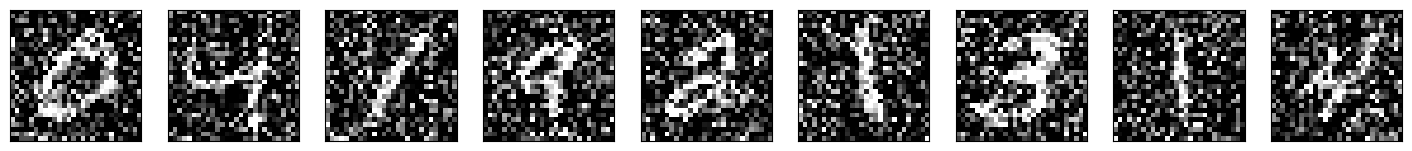

In [5]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()

The following code snippet sets up the model in Keras. In this code there are 3 convolutional layers decompressing the image and then 3 layers bringing them back to the output layer. A really nice explaination of the process behind a CNN is given by [Adrian Rosebrock (pyimagesearch)](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/). Adrian explains each of the parameters that go into the layers and explains in a very simple way how each layer has a kernal applied to it. Kernals will reduce the layers as you apply more convolutions, effectively reducing the data from layer to layer. This will also happen with a term called maxpooling, and it effectively helps us denoise our data.

Now the object of our excercise here is to see if we can remove some of the noise from the image and get clearer pictures. In this example maxpooling effectively shrinks our matrix while the upsampling trys to rebuild it. You will now note that the convolutions with the exception of one layer, all have "padding=same". That means the kernals will not reduce the matrix in this case.

This is a bit light but try it out and play with the code and see what happens. Have a look at the calculations at each level (in comments beside the code). You will notice that we have one layer without any padding. When this happens the kernal (3,3) will reduce the dimension by 2.

It is very important that you understand this as both applying a kernal and maxpooling will reduce the dimension of the input matrix.
This [site](https://icecreamlabs.com/2018/08/19/3x3-convolution-filters%E2%80%8A-%E2%80%8Aa-popular-choice/) gives a nice visualisation of how a kernal works.


Take a look at the network structure. When you experiment with it, make sure the your output matrix dimensions are the same as the input dimensions.




(28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


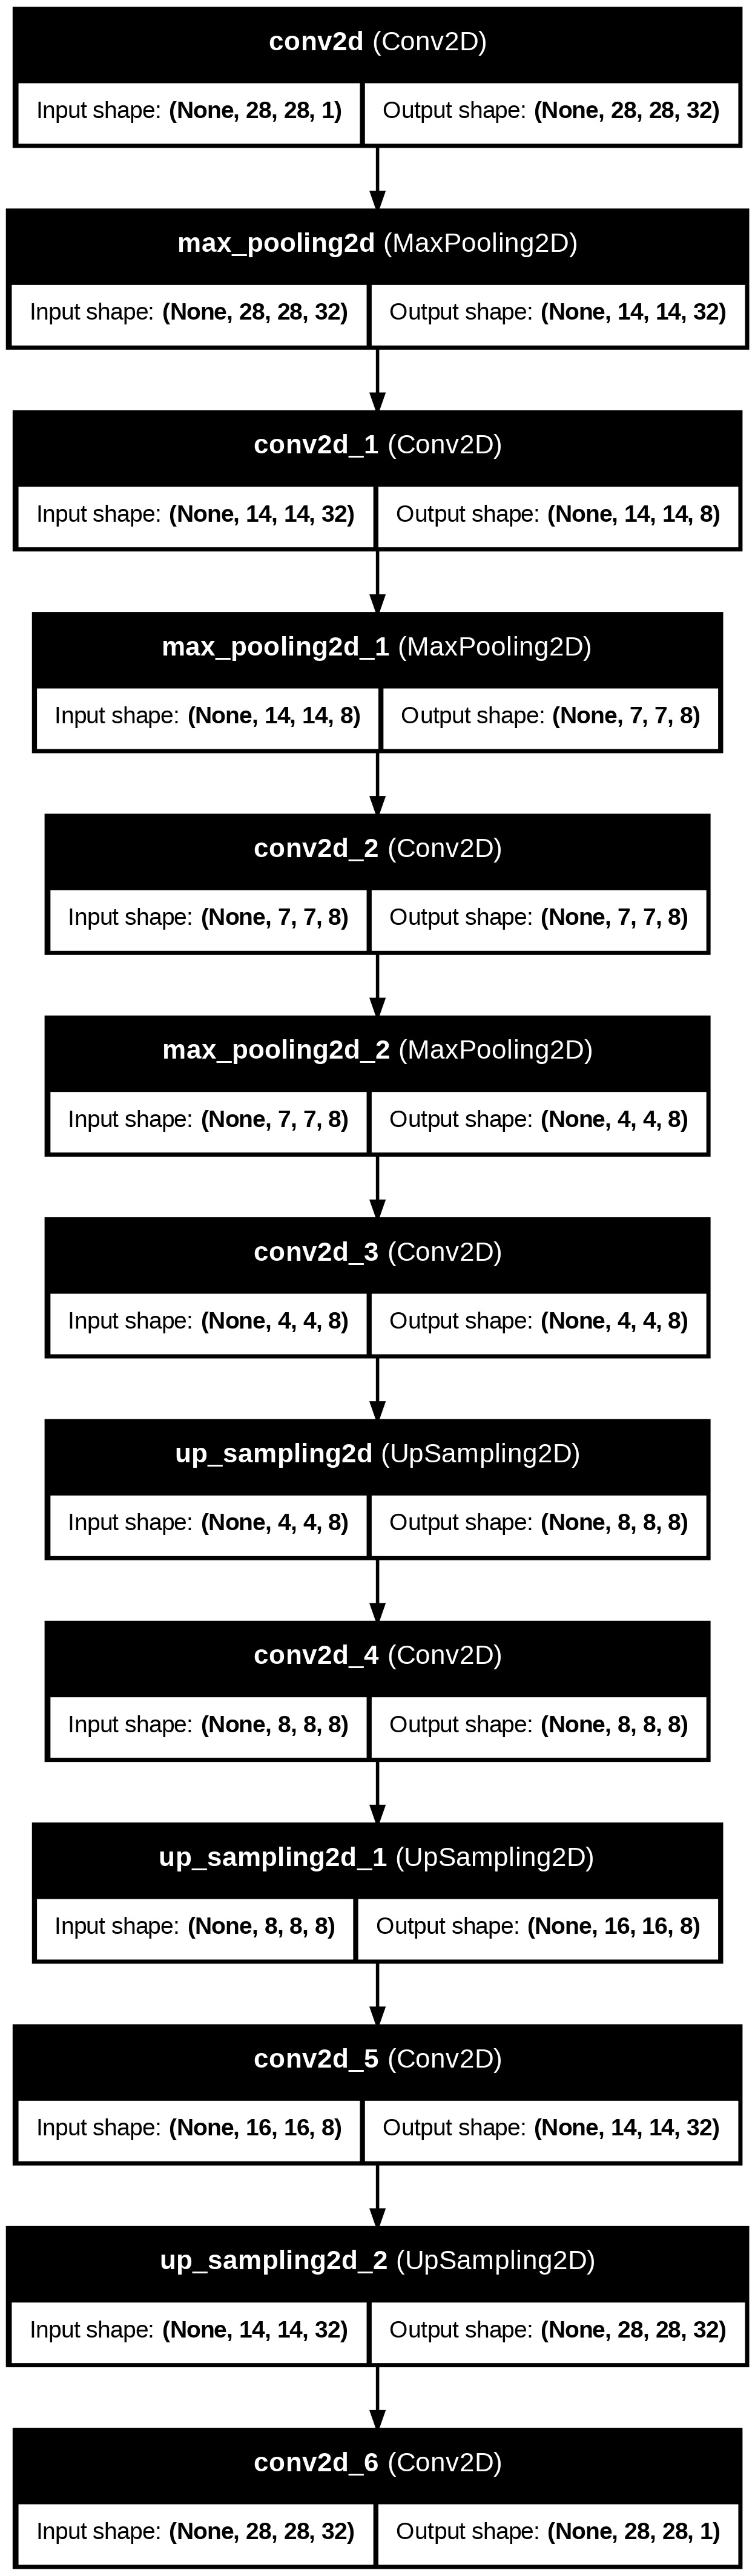

In [6]:
from tensorflow.python.keras import backend as K
if K.image_data_format() == 'channels_first' :
  input_shape = (1, 28, 28)
  x_train1 = x_train1.reshape(x_train1.shape[0], 1, 28, 28)
  x_test1 = x_test1.reshape(x_test1.shape[0], 1, 28, 28)
else:
  input_shape = (28, 28, 1)
  x_train1 = x_train1.reshape(x_train1.shape[0], 28, 28, 1)
  x_test1 = x_test1.reshape(x_test1.shape[0], 28, 28, 1)

input_img = (28, 28, 1)
print(input_shape)
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=input_img)) #image size 28x28
model.add(keras.layers.MaxPooling2D((2, 2))) #image size 14x14 max pooling reduces dimesnion by half
model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')) #image size 14x14
model.add(keras.layers.MaxPooling2D((2, 2))) #image size 7x7
model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')) #image size 7x7
model.add(keras.layers.MaxPooling2D((2, 2), padding='same')) #max pooling rounds up 4x4 if padding =same

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')) # image size 4x4
model.add(keras.layers.UpSampling2D((2, 2))) # image doubled to 8x8
model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2, 2))) # image size 8x8
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu')) # 14x14 image reduces by 2 for both rows as kernal will reduces it without padding =same
model.add(keras.layers.UpSampling2D((2, 2))) #28x28 image doubles
model.add(keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # bringing  the filters back to 1

#'mean_squared_error','binary_crossentropy'
model.compile(loss='mean_squared_error',
              optimizer='adam',
#              optimizer=tf.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),

              metrics = ['accuracy'])
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



Now we are going to fit the model to the data. This is exactly the same as the regular autoencoder.  We are going to use 50 epochs and our batch size is 128. Play with these and see what happens.

In [7]:
model.fit(x_train1, x_train1,verbose=1,epochs=50, batch_size=128,shuffle=True)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4349 - loss: 0.1104
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4566 - loss: 0.0929
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4616 - loss: 0.0901
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4637 - loss: 0.0888
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4652 - loss: 0.0879
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4662 - loss: 0.0871
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4671 - loss: 0.0866
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4676 - loss: 0.0862
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4681 - loss: 0.0859
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4684 - loss: 0.0856
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4689 - loss: 0.0853
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


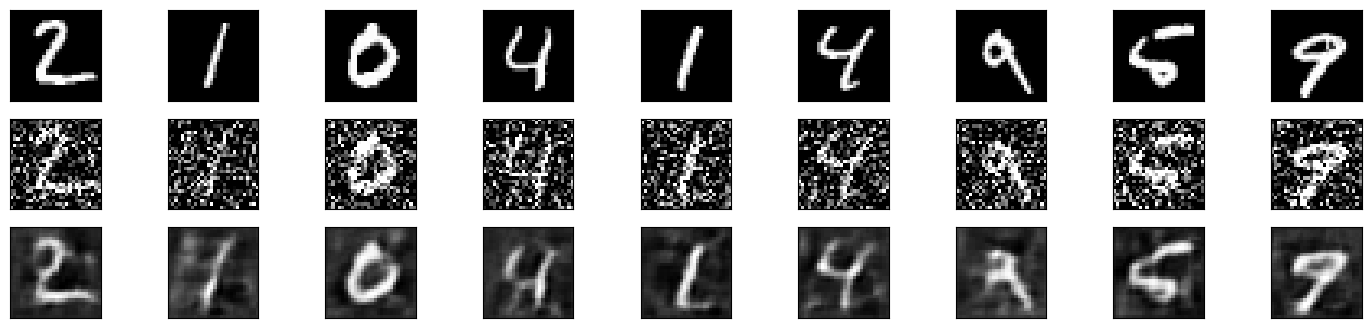

In [8]:
decoded_imgs = model.predict(x_test1)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisey data
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + (2*n))
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Finally, We have 3 rows of pictures. The first is the orignal numbers. The second is the noisey numbers and the third are the denoised number.You can see we have managed to re-create the images without most of the noise. They are not perfect but they are a vast improvement from the nosiey images.

I would like you to experiment with the structure of the autoencoder. Try and reduce the kernal size to a 2x2. Can you get the system to work? Don't forget to leave your comments on the comments board.
